In [1]:
%matplotlib notebook
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
import utils

In [5]:
base_dir = '/home/david/git/LadderVAE/out'

In [6]:
def filt(x, window_size=100):
    y = np.convolve(x, np.ones((window_size,))/window_size, mode='same')
    return y

In [7]:
!dir out/

20190906-232419  20190907-095555


In [8]:
filename = os.path.join(base_dir, '20190906-232419', 'stat.h5')
with h5py.File(filename, "r") as f:
    stat = utils.Stat(f).load()

eval_elbo: (2000,)
eval_kl_0: (2000,)
eval_kl_1: (2000,)
eval_kl_tot: (2000,)
eval_log_px: (2000,)
eval_log_pz_0: (2000,)
eval_log_pz_1: (2000,)
eval_log_qz_0: (2000,)
eval_log_qz_1: (2000,)
train_elbo: (470000,)
train_kl_0: (470000,)
train_kl_1: (470000,)
train_kl_tot: (470000,)
train_log_px: (470000,)
train_log_pz_0: (470000,)
train_log_pz_1: (470000,)
train_log_qz_0: (470000,)
train_log_qz_1: (470000,)


In [20]:
import re

#str = '*Epoch=4999	Time=33.09	LR=0.00200	E_qsamples=1	IVAEsamples=1	temp: 1.00	TRAIN:	Cost=-85.84437	logp(x|z1)=-61.05516	log p(z): -81.585|-45.422	log q(z): -70.604|-31.614'
epoch, t, elbo, log_px, log_pz_0, log_pz_1, log_qz_0, log_qz_1 = [], [], [], [], [], [], [], []
with open('../LVAE/outfolder_20190811/trainlogfile.log') as f: 
    for mystr in f.readlines():
        lx = re.split('=| |\t|\|', mystr)
        epoch += [int(lx[1])]
        t += [float(lx[3])]
        elbo += [float(lx[14])]
        log_px += [float(lx[17])]
        log_pz_0 += [float(lx[20])]
        log_pz_1 += [float(lx[21])]
        log_qz_0 += [float(lx[20])]
        log_qz_1 += [float(lx[21])]
epoch = np.array(epoch)
elbo = np.array(elbo)
log_px = np.array(log_px)
log_pz_0 = np.array(log_pz_0)
log_pz_1 = np.array(log_pz_1)
log_qz_0 = np.array(log_qz_0)
log_qz_1 = np.array(log_qz_1)


<IPython.core.display.Javascript object>


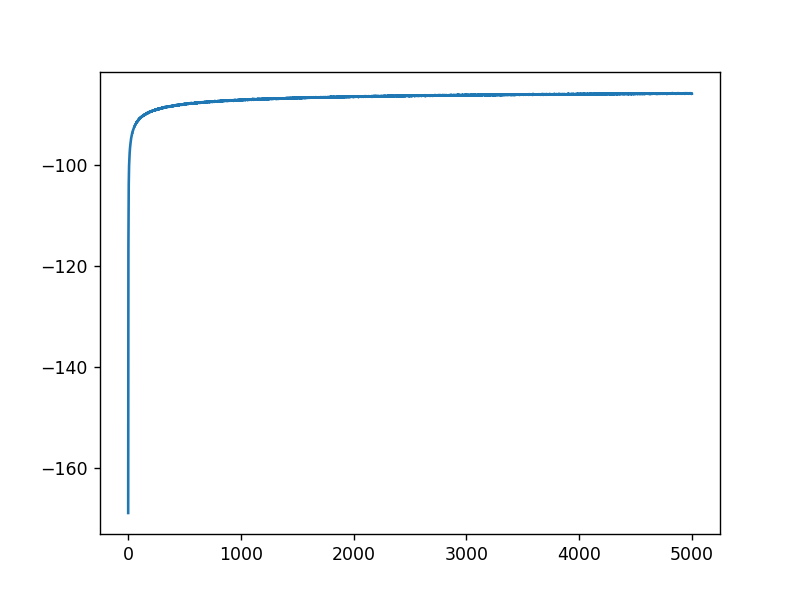

In [21]:
plt.figure()
#plt.plot(epoch, log_px)
#plt.plot(epoch, log_pz_0)
#plt.plot(epoch, log_pz_1)
#plt.plot(epoch, log_qz_0)
#plt.plot(epoch, log_qz_1)

<IPython.core.display.Javascript object>


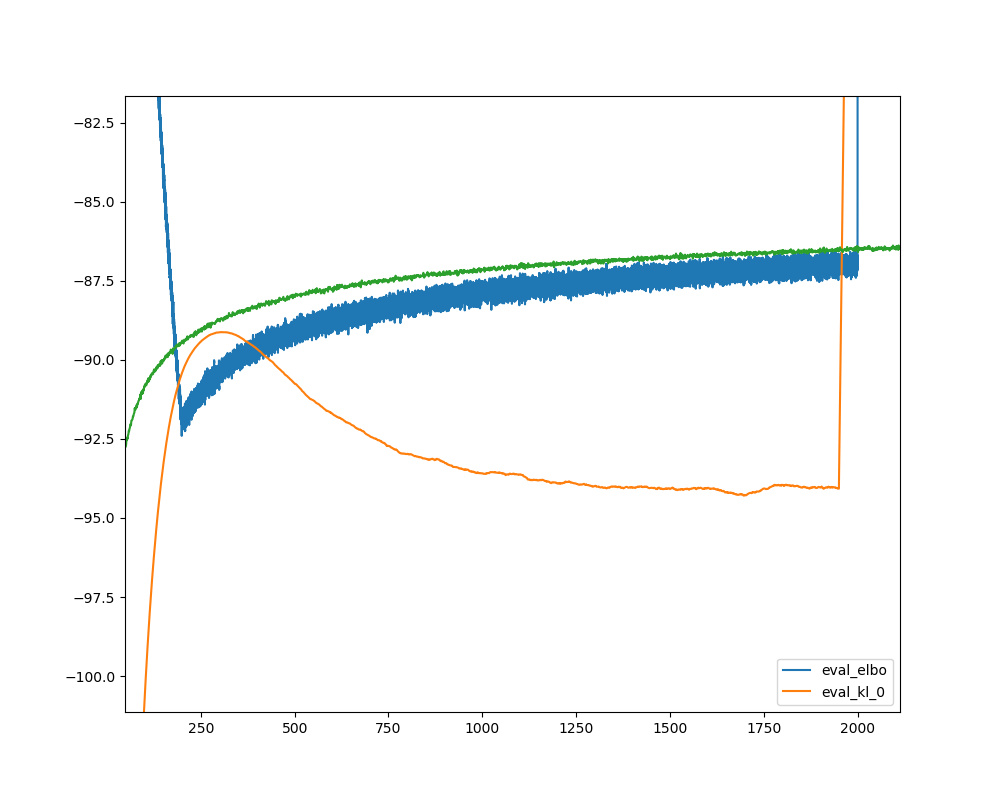

In [22]:
plt.figure(figsize=(10, 8), dpi= 80)
for key in ['train_elbo', 'eval_elbo']:
    if key.startswith('train'):
        x = np.arange(0,stat.current[key].shape[0]/235, 1.0/235)
    else:
        x = np.arange(0,stat.current[key].shape[0])
    plt.plot(x, filt(stat.current[key]))
plt.ylim([-200, 100])
_ = plt.legend(stat.current.keys())
x = np.arange(0, elbo.shape[0])
plt.plot(x, elbo)
